# Data analysis

### download libraries

In [53]:
import numpy as np
import pandas as pd
import math
import csv
import matplotlib.pyplot as plt
import random

### download datasets

In [147]:
# !pip install skyfield

In [146]:
from skyfield.api import Star, load
from skyfield.data import hipparcos

### Make a dictionary of the constellation names of the format $\newline$ {abbreviation: constellation_name...}

In [117]:
constellations_names_csv = pd.read_csv("data/constellation_names.csv", delimiter= ',', header = None)
constellations_names_csv.columns = ['cons_name_abb', 'cons_name', 'cons_name_std']

In [3]:
# print(constellations_names_csv)

In [118]:
constellation_names = {}
for rows, cols in constellations_names_csv.iterrows():
    constellation_names[cols['cons_name_abb']] =  cols['cons_name']
print(constellation_names)

{'Aql': 'Aquila', 'And': 'Andromeda', 'Scl': 'Sculptor', 'Ara': 'Ara', 'Lib': 'Libra', 'Cet': 'Cetus', 'Ari': 'Aries', 'Pyx': 'Pyxis', 'Boo': 'Bootes', 'Cae': 'Caelum', 'Cha': 'Chamaeleon', 'Cnc': 'Cancer', 'Cap': 'Capricornus', 'Car': 'Carina', 'Cas': 'Cassiopeia', 'Cen': 'Centaurus', 'Cep': 'Cepheus', 'Com': 'Coma Berenices', 'Cvn': 'Canes Venatici', 'Aur': 'Auriga', 'Col': 'Columba', 'Cir': 'Circinus', 'Crt': 'Crater', 'CrA': 'Corona Australis', 'CrB': 'Corona Borealis', 'Crv': 'Corvus', 'Cru': 'Crux', 'Cyg': 'Cygnus', 'Del': 'Delphinus', 'Dor': 'Dorado', 'Dra': 'Draco', 'Nor': 'Norma', 'Eri': 'Eridanus', 'Sge': 'Sagitta', 'For': 'Fornax', 'Gem': 'Gemini', 'Cam': 'Camelopardalis', 'CMa': 'Canis Major', 'UMa': 'Ursa Major', 'Gru': 'Grus', 'Her': 'Hercules', 'Hor': 'Horologium', 'Hya': 'Hydra', 'Hyi': 'Hydrus', 'Ind': 'Indus', 'Lac': 'Lacerta', 'Mon': 'Monoceros', 'Lep': 'Lepus', 'Leo': 'Leo', 'Lup': 'Lupus', 'Lyn': 'Lynx', 'Lyr': 'Lyra', 'Ant': 'Antlia', 'Mic': 'Microscopium', 'Mus':

### constellations_art

In [5]:
constellations_art_csv = pd.read_csv("data/constellations_art.csv", delimiter=' ', header = None, error_bad_lines=False)
constellations_art_csv.loc[-1] = ["Ara","ara.png", "98", "70", "83081", "191", "93", "85727", "107", "249", "88714"] 
constellations_art_csv.loc[-2] = ["Sge", "sagitta.png", "6", "12", "98920", "249", "213", "96757", "218", "243", "96837"] 

constellations_art_csv.columns = ['cons_name_abb', 'image', "star1_x", "star1_y", "star1_hip", "star2_x", "star2_y", "star2_hip", "star3_x", "star3_y", "star3_hip"]

b'Skipping line 6: expected 11 fields, saw 12\nSkipping line 74: expected 11 fields, saw 12\n'


In [6]:
print(constellations_art_csv)

    cons_name_abb          image star1_x star1_y star1_hip star2_x star2_y  \
 0            And  andromeda.png     198     215      3881     337     136   
 1            Ant     antlia.png       4      84     51172      72      69   
 2            Aps       apus.png      66      60     81852      76      87   
 3            Aql     aquila.png     163     232     97649     385     131   
 4            Aqr   aquarius.png     144     464    115438     179      98   
..            ...            ...     ...     ...       ...     ...     ...   
 80           Vir      virgo.png      65     389     72220     454      57   
 81           Vol     volans.png      55      85     44382     210     122   
 82           Vul  vulpecula.png      35     133     98543     174     111   
-1            Ara        ara.png      98      70     83081     191      93   
-2            Sge    sagitta.png       6      12     98920     249     213   

    star2_hip star3_x star3_y star3_hip  
 0       3092     224

### constellations_hip

In [7]:
column_names = list(range(1,60))
constellations_hip_csv = pd.read_csv("data/constellations_hip.csv", delimiter=' ', header = None, names = column_names)

In [8]:
# print(constellations_hip_csv)

In [9]:
constellations_lines = {}
for i in range(88):
    constellations_lines[constellations_hip_csv[1][i]] = constellations_hip_csv[2][i]
# print(constellations_lines)

In [111]:
constellation_lines_bw_hip = {}
hip_values = []
for i in range(88):
    for j in range(3,59):
        if not(math.isnan(float(constellations_hip_csv[j][i]))):
            hip_values.append(constellations_hip_csv[j][i])
    constellation_lines_bw_hip[constellations_hip_csv[1][i]] = hip_values
    hip_values = []
print(constellation_lines_bw_hip)

{'Aql': ['98036', 97649.0, 97649.0, 97278.0, 97649.0, 95501.0, 95501.0, 97804.0, 99473.0, 97804.0, 95501.0, 93747.0, 93747.0, 93244.0, 95501.0, 93805.0], 'And': ['677', 3092.0, 3092.0, 5447.0, 9640.0, 5447.0, 5447.0, 4436.0, 4436.0, 3881.0], 'Scl': ['116231', 4577.0, 4577.0, 115102.0, 115102.0, 116231.0], 'Ara': ['88714', 85792.0, 85792.0, 83081.0, 83081.0, 82363.0, 82363.0, 85727.0, 85727.0, 85267.0, 85267.0, 85258.0, 85258.0, 88714.0], 'Lib': ['77853', 76333.0, 76333.0, 74785.0, 74785.0, 72622.0, 72622.0, 73714.0, 73714.0, 76333.0], 'Cet': ['10324', 11484.0, 8102.0, 3419.0, 3419.0, 1562.0, 3419.0, 5364.0, 5364.0, 6537.0, 6537.0, 8645.0, 8645.0, 11345.0, 11345.0, 12390.0, 12390.0, 12770.0, 12770.0, 11783.0, 11783.0, 8102.0, 10826.0, 12390.0, 10826.0, 12387.0, 12387.0, 12706.0, 12706.0, 14135.0, 14135.0, 13954.0, 13954.0, 12828.0, 12828.0, 11484.0, 11484.0, 12093.0, 12093.0, 12706.0], 'Ari': ['13209', 9884.0, 9884.0, 8903.0, 8903.0, 8832.0], 'Sct': ['92175', 92202.0, 92202.0, 92814.0, 

### star_names.csv

In [122]:
column_names = list(range(50))
star_names_csv = pd.read_csv("data/star_names.csv", delimiter='\s+| | |,', names = column_names, error_bad_lines=False)

<ipython-input-122-76f23a43f9bd>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  star_names_csv = pd.read_csv("data/star_names.csv", delimiter='\s+| | |,', names = column_names, error_bad_lines=False)


In [12]:
# print(star_names_csv)

In [128]:
list_temp = []
whole_temp = []
name = ""
for i in range(1, 1176):
    for j in range(0,50):
        if str(star_names_csv[j][i]) != 'nan':
            if star_names_csv[j][i] != None :
                list_temp.append(star_names_csv[j][i])
    whole_temp.append(list_temp)    
    list_temp = []

star_names = {}
together_list = []
for i in range(len(whole_temp)):
    if whole_temp[i][0] == "#":
        star_names[name] = together_list
        together_list = []
        name = whole_temp[i][1]
    else:
        together_list.append(whole_temp[i])
star_names[name] = together_list

# for i in star_names:
#     print(i)
#     print()
print(star_names['Andromeda'])

[['677|_("Alpheratz")', '1', '2', '5', '6', '11', '12', '37', '38'], ['677|_("Sirrah")', '23', '37'], ['5447|_("Mirach")', '1', '2', '5', '6', '11', '12', '23', '37', '38'], ['9640|_("Almach")', '1', '2', '5', '6', '11', '12'], ['9640|_("Almaak")', '38'], ['9640|_("Alamak")', '23'], ['6411|_("Adhil")', '1', '2', '6', '11', '12'], ['7607|_("Nembus")', '2', '11', '12'], ['7513|_("Titawin")', '4', '6', '12'], ['116076|_("Veritate")', '4', '6', '12'], ['6999|_("Thail")', '11'], ['12191|_("Buna")', '36']]


### ssystems_major.csv

In [129]:
with open('data/ssystem_major.csv', newline='') as f:
    reader = csv.reader(f)
    temp_data_ssystem_major = list(reader)

# print(temp_data_ssystem)

In [130]:
data_ssystem_major = []

for i in range(len(temp_data_ssystem_major)):
    try:
        if temp_data_ssystem_major[i][0][0] != "#":
            data_ssystem_major.append(temp_data_ssystem_major[i])
    except:
        continue
# print(data_ssystem)

In [131]:
temp_major = []
temp2_major = []
for i in range(len(data_ssystem_major)):
    if "type=" not in data_ssystem_major[i][0]:
        temp_major.append(data_ssystem_major[i])
    else:
        temp_major.append(data_ssystem_major[i])
        temp2_major.append(temp_major)
        temp_major = []
        
for i in temp2_major:
    print(i)
    print()

[['[adrastea]'], ['iau_moon_number=JXV'], ['absolute_magnitude=12.4'], ['albedo=0.1'], ['color=1.', ' 0.9', ' 0.75'], ['name=Adrastea'], ['orbit_AscendingNode=253.6924110934923'], ['orbit_Eccentricity=0.006543120249224196'], ['orbit_Epoch=2454619.50000'], ['orbit_Inclination=0.06166936906340893'], ['orbit_LongOfPericenter=249.4662007624690000'], ['orbit_MeanLongitude=252.4809048448870000'], ['orbit_Period=0.3023760117035458'], ['orbit_SemiMajorAxis=129866.6459712491'], ['parent=Jupiter'], ['radius=8.2'], ['rot_equator_ascending_node=213.7'], ['rot_obliquity=15.5'], ['rot_rotation_offset=309.52'], ['rot_pole_ra=268.05'], ['rot_pole_ra1=-0.009'], ['rot_pole_de=64.49'], ['rot_pole_de1=0.003'], ['rot_pole_w0=33.29'], ['rot_pole_w1=1206.9986602'], ['tex_map=lune.png'], ['type=moon']]

[['[amalthea]'], ['iau_moon_number=JV'], ['absolute_magnitude=7.4'], ['albedo=0.09'], ['color=1.', ' 0.627', ' 0.492'], ['name=Amalthea'], ['model=j5amalthea_MLfix.obj'], ['orbit_AscendingNode=141.552152079467

In [ ]:
cols = range(87)

df = pd.DataFrame(temp2, columns=cols)
# print(df)

### ssystems_minor.csv

In [ ]:
with open('data/ssystem_minor.csv', newline='') as f:
    reader1 = csv.reader(f)
    temp_data_ssystem_minor = list(reader1)
    
# print(temp_data_ssystem_minor)

In [ ]:
data_ssystem_minor = []

for i in range(len(temp_data_ssystem_minor)):
    try:
        if temp_data_ssystem_minor[i][0][0] != "#":
            data_ssystem_minor.append(temp_data_ssystem_minor[i])
    except:
        continue
# print(data_ssystem_minor)

In [ ]:
temp_minor = [data_ssystem_minor[0][0]]
temp2_minor = []
for i in range(1,len(data_ssystem_minor)):
    if "=" in data_ssystem_minor[i][0]:
        temp_minor.append(data_ssystem_minor[i])
    else:
#         temp_minor.append(data_ssystem_minor[i])
        temp2_minor.append(temp_minor)
        temp_minor = [data_ssystem_minor[i]]
        
for i in temp2_minor:
    print(i)
    print()

### base_locations.txt

In [ ]:
with open('data/base_locations.txt', newline='') as f:
    reader2 = csv.reader(f)
    base_locations_csv = list(reader2)
# print(base_locations_csv)

In [ ]:
base_locations_t = []

for i in range(len(base_locations_csv)):
    try:
        if base_locations_csv[i][0][0] != "#":
            base_locations_t.append(base_locations_csv[i])
    except:
        continue

# for i in base_locations:
#     print(i)
#     print()

In [ ]:
temp_base = []
temp_base2 = []
str = ""
for i in base_locations_t:
    i.append("\t")
    for char in i[ : :1][0]:
        if char != "\t":
            str = str+char
        else:
            temp_base.append(str)
            str = ""
    temp_base.append(str)
    str = ""
    temp_base2.append(temp_base)
    temp_base = []
    
# for j in temp_base2:
#     print(j)
        

In [ ]:
cols = ["LocationName", "Provice/State", "Region", "Type code", "Population (thousand)", 
        "Latitude (deg[N/S]", "Longitude (deg[E/W])", "Altitude (meters)", 
        "Light Pollution (1-9 Bortle scale)", "TimeZone", "Planet", "LandscapeKey"]
base_locations = pd.DataFrame(temp_base2, columns=cols)
print(base_locations)

### lets take out some data

In [14]:
print(constellations_art_csv)

    cons_name_abb          image star1_x star1_y star1_hip star2_x star2_y  \
 0            And  andromeda.png     198     215      3881     337     136   
 1            Ant     antlia.png       4      84     51172      72      69   
 2            Aps       apus.png      66      60     81852      76      87   
 3            Aql     aquila.png     163     232     97649     385     131   
 4            Aqr   aquarius.png     144     464    115438     179      98   
..            ...            ...     ...     ...       ...     ...     ...   
 80           Vir      virgo.png      65     389     72220     454      57   
 81           Vol     volans.png      55      85     44382     210     122   
 82           Vul  vulpecula.png      35     133     98543     174     111   
-1            Ara        ara.png      98      70     83081     191      93   
-2            Sge    sagitta.png       6      12     98920     249     213   

    star2_hip star3_x star3_y star3_hip  
 0       3092     224

# Visualizing the values

### constellations_art_csv

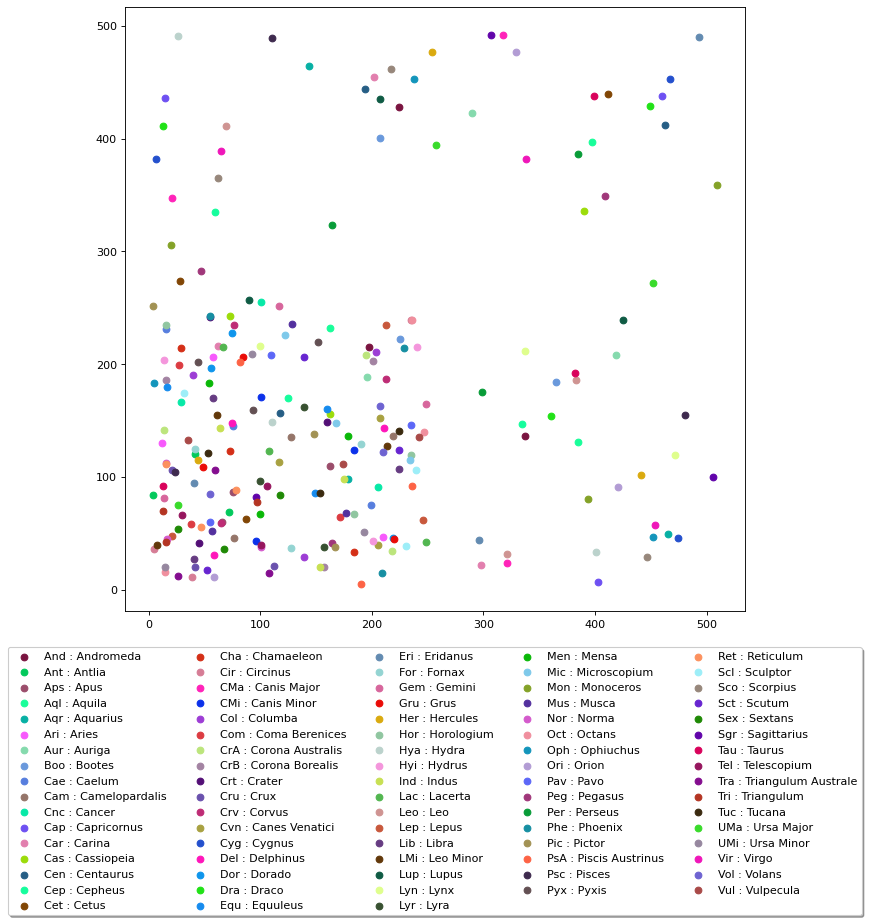

In [121]:
star1_x, star1_y, star2_x, star2_y, star3_x, star3_y = [], [], [], [], [], []
star_x, star_y = [], []

for i in range(len(constellations_art_csv)):
    star1_x = list(constellations_art_csv['star1_x'])
    star1_y = list(constellations_art_csv['star1_y'])
    star2_x = list(constellations_art_csv['star2_x'])
    star2_y = list(constellations_art_csv['star2_y'])
    star3_x = list(constellations_art_csv['star3_x'])
    star3_y = list(constellations_art_csv['star3_y'])
    abb = list(constellations_art_csv['cons_name_abb'])

plt.figure(figsize=(10,10), dpi=80)

for i in range(83):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    star_x = ([star1_x[i], star2_x[i], star3_x[i]])
    star_y = ([star1_y[i], star2_y[i], star3_y[i]])
    plt.scatter(star_x, star_y, color = color, label = "{} : {}".format(abb[i], 
                                                                   constellation_names[abb[i]]))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

# BSC5 Catalogue

In [142]:
cols = range(5)
bsc5_dat = pd.read_csv("data/bsc5.txt", names=cols, header=None)

In [143]:
print(bsc5_dat)

                                                      0    1   2   3   4
0        1          BD+44 4550      3 36042         ...  NaN NaN NaN NaN
1        2          BD-01 4525      6128569         ...  NaN NaN NaN NaN
2        3 33    PscBD-06 6357     281285721002I    ...  NaN NaN NaN NaN
3        4 86    PegBD+12 5063     87 917012004     ...  NaN NaN NaN NaN
4        5          BD+57 2865    123 21085         ...  NaN NaN NaN NaN
...                                                 ...  ...  ..  ..  ..
9105  9106          CP-73 2346 225233255629         ...  NaN NaN NaN NaN
9106  9107          BD+33 4828 225239 536222002     ...  NaN NaN NaN NaN
9107  9108          CP-72 2800 2252532556311001     ...  NaN NaN NaN NaN
9108  9109          BD+25 5068 225276 73731    I    ...  NaN NaN NaN NaN
9109  9110          BD+60 2667 225289 10962         ...  NaN NaN NaN NaN

[9110 rows x 5 columns]


# Skyfield

In [217]:
with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

In [218]:
# print(df)
barnards_star = Star.from_dataframe(df.loc[87937])
planets = load('de421.bsp')
earth = planets['earth']

ts = load.timescale()
t = ts.now()
astrometric = earth.at(t).observe(barnards_star)
ra, dec, distance = astrometric.radec()
print(ra)
print(dec)

17h 57m 47.31s
+04deg 45' 21.7"


In [245]:
#https://github.com/skyfielders/python-skyfield/blob/aa59e2d4711c3a95804170889f138402edbf4237/skyfield/data/hipparcos.py
#https://github.com/skyfielders/python-skyfield/blob/aa59e2d4711c3a95804170889f138402edbf4237/skyfield/documentation/stars.rst

COLUMN_NAMES = ('catalog', 'hip', 'Proxy', 'RAhms', 'DEdms', 'magnitude',
    'VarFlag', 'r_Vmag', 'ra_degree', 'dec_degree', 'AstroRef', 'parallax_mas', 
    'ra_mas_per_year','dec_mas_per_year', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 
    'e_pmDE', 'DE:RA','Plx:RA', 'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA',
    'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag','e_BTmag', 'VTmag', 
    'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V','V-I', 'e_V-I', 'r_V-I', 'CombMag', 
    'Hpmag', 'e_Hpmag', 'Hpscat','o_Hpmag', 'm_Hpmag', 'Hpmax', 'HPmin', 'Period', 
    'HvarType','moreVar', 'morePhoto', 'CCDM', 'n_CCDM', 'Nsys', 'Ncomp',
    'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho', 'e_rho',
    'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
    'CPD', '(V-I)red', 'SpType', 'r_SpType',)

hip_main_txt = pd.read_csv("data/hip_main.txt", delimiter = "|", 
                           names=COLUMN_NAMES, compression=None)

In [246]:
hip_main_txt['ra_hour'] = pd.to_numeric(hip_main_txt['ra_degree'], errors='coerce') /15
hip_main_txt = hip_main_txt.set_index('hip')

### RA and Dec ( RAhms and DEdms)
* **RA** is the position of a star measured in the east–west direction on the sky (like longitude, the position of a place on Earth measured east or west of the prime meridian at Greenwich, England).
* **Dec** is the position of the star measured in the north–south direction, like the latitude of a city, which is measured north or south of the equator.
* RA in **units of hours, minutes, and seconds**, like time. We list Dec in **degrees, minutes, and seconds of arc**. Ninety degrees make up a right angle, 60 minutes of arc make up a degree, and 60 seconds of arc equal a minute of arc. A minute or second of arc is also often called an “arc minute” or an “arc second,” respectively.

In [254]:
def get_RA_and_dec_by_hip(hip):
    RA_list = []
    Dec_list = []
    for rows, cols in hip_main_txt.iterrows():
        if rows == hip:
            RA_list = cols['RAhms'].split()
            Dec_list = cols['DEdms'].split()
            print("RA : {}h, {}m, {}s".format(RA_list[0], RA_list[1], RA_list[2]))
            print("Dec : {}deg, {}m, {}s".format(Dec_list[0], Dec_list[1], Dec_list[2]))

get_RA_and_dec_by_hip(87977)

RA : 17h, 58m, 16.57s
Dec : -41deg, 23m, 18.7s


In [258]:
url = ('https://raw.githubusercontent.com/Stellarium/stellarium/master'
       '/skycultures/western_SnT/constellationship.fab')

def parse_constellations(lines):
    """Return a list of constellation outlines.
    Each constellation outline is a list of edges, each of which is
    drawn between a pair of specific stars::
        [
            (name, [(star1, star2), (star3, star4), ...]),
            (name, [(star1, star2), (star3, star4), ...]),
            ...
        ]
    Each name is a 3-letter constellation abbreviation; each star is an
    integer Hipparcos catalog number.  See :ref:`neowise-chart` for an
    example of how to combine this data with the Hipparcos star catalog
    to draw constellation lines on a chart.
    """
    constellations = []
    for line in lines:
        line = line.lstrip()
        if line.startswith(b'#'):
            continue
        fields = line.split()
        if not fields:
            continue
        name = fields[0]
        edges = [(int(fields[i]), int(fields[i+1]))
                 for i in range(2, len(fields), 2)]
        constellations.append((name.decode('utf-8'), edges))
    return constellations

with load.open(url) as f:
    constellations = parse_constellations(f)
    
print(constellations)

edges = [edge for name, edges in constellations for edge in edges]
edges_star1 = [star1 for star1, star2 in edges]
edges_star2 = [star2 for star1, star2 in edges]

[('And', [(677, 3092), (3092, 5447), (5447, 9640), (113726, 116631), (116631, 116805), (116805, 116584), (116584, 116805), (116805, 116631), (116631, 1473), (1473, 2912), (2912, 3092), (3092, 2912), (2912, 5447), (5447, 4436), (4436, 3881), (3881, 5434), (5434, 7607), (3092, 3031), (3031, 3693), (3693, 4463)]), ('Ant', [(53502, 51172), (51172, 46515)]), ('Aps', [(72370, 81065), (80047, 81852), (81852, 81065)]), ('Aql', [(98036, 97649), (97649, 97278), (97278, 95501), (95501, 93805), (93805, 95501), (95501, 93747), (93747, 95501), (95501, 97804), (97804, 99473), (93244, 93747), (93805, 93429), (99473, 96468), (96468, 93805), (93805, 93747)]), ('Aqr', [(102618, 106278), (106278, 109074), (109074, 110395), (110395, 110960), (110960, 111497), (111497, 110960), (110960, 110672), (110672, 109074), (109139, 106278), (106278, 109074), (109074, 110003), (110003, 112961), (112961, 114724), (114724, 115033), (115033, 115438), (115438, 115033), (115033, 114341), (114341, 115033), (115033, 113136),